# OpenCV 基础操作

## 一、静态图像处理
### 1. 图像读取与显示
这部分内容主要介绍如何使用OpenCV读取和显示图像。

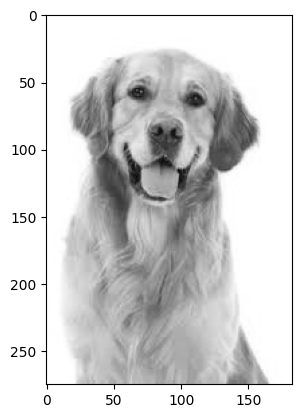

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# 步骤一、读取图像
# cv2.imread方法用于读取图像，它有两个主要参数：
#   - filename: 要读取的图像文件的路径。
#   - flags: 读取图像的模式，常用的值有：
#       - cv2.IMREAD_COLOR: 以彩色模式读取图像，默认值，忽略图像的透明度通道。
#       - cv2.IMREAD_GRAYSCALE: 以灰度模式读取图像。
#       - cv2.IMREAD_UNCHANGED: 以包含透明度通道的模式读取图像。
img_1 = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_2 = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_GRAYSCALE)
img_3 = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_UNCHANGED)
# 步骤二、显示图像
"""
# OpenCV自带的方法
# 检查图像是否成功读取
CV_image = img_1 # 这边可以选择看看上面三个图像的不同之处
if CV_image is None:
    print("无法读取图像，请检查文件路径和文件名。")
else:

    # 显示图像
    # cv2.imshow 用于显示图像，第一个参数为窗口名称，第二个参数为要显示的图像
    # cv2.imshow('Displayed Image', CV_image)
    # 等待按键事件
    # cv2.waitKey 用于等待按键事件，参数为等待时间（毫秒），0 表示无限等待
    # cv2.waitKey(0)
    # 关闭所有窗口
    # cv2.destroyAllWindows 用于关闭所有由 OpenCV 创建的窗口
    # cv2.destroyAllWindows()
"""
# 使用matplotlib的pyplot来显示图像
# plt.imshow方法用于显示图像，它有以下主要参数：
#   - X: 要显示的图像数组，可以是二维（灰度图像）或三维（彩色图像）。
#   - cmap: 颜色映射，对于灰度图像，常用的是'gray'。
#   - interpolation: 插值方法，用于调整图像的显示质量。
# 由于OpenCV使用BGR颜色模式，而matplotlib使用RGB颜色模式，所以需要转换颜色通道
# 使用cv2.cvtColor方法将BGR图像转换为RGB图像
# cv2.cvtColor方法用于颜色空间转换，它有两个主要参数：
#   - src: 要转换的图像数组。
#   - code: 转换的代码，常用的值有：
#       - cv2.COLOR_BGR2RGB: 将BGR图像转换为RGB图像。
#       - cv2.COLOR_BGR2GRAY: 将BGR图像转换为灰度图像。

OpenCV_image = img_1 # 这边可以选择看看上面几个图像的不同之处
img_rgb = cv2.cvtColor(OpenCV_image, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(OpenCV_image, cv2.COLOR_BGR2GRAY) # 注意传入的就是灰度图像时注释掉这句

plt_image = img_rgb # 这里可以选择使用img_rgb或img_gray
plt.imshow(plt_image)
#plt.imshow(plt_image, cmap='gray') # 选择使用img_gray时用这句
plt.show()

### 2.图像滤波
这部分是对图像进行滤波处理的代码，主要包括：
- 卷积运算与边界填充
- 均值滤波、高斯滤波、中值滤波、双边滤波

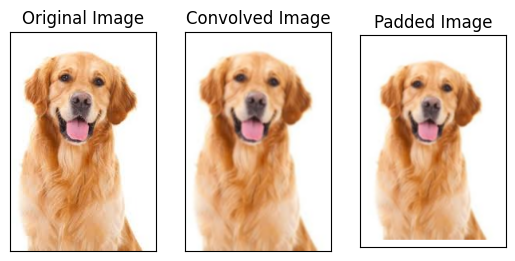

In [ ]:
# 卷积运算与边界填充
import cv2
import numpy as np
from matplotlib import pyplot as plt

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img_rgb = cv2.cvtColor(cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB) # 偷懒写法（布什）

# 步骤一、定义卷积核（常见尺寸分为 3x3、5x5 等）
# 卷积核是一个二维数组，用于在图像上进行卷积操作，不同的卷积核可以实现不同的图像效果，如模糊、锐化等
# 这里以 3x3 的均值卷积核为例，它可以对图像进行模糊处理
# 卷积核的每个元素表示对应位置的权重，所有权重之和通常为 1
kernel = np.ones((3, 3), np.float32) / 9
# 解释：
# - np.ones((3, 3), np.float32) 创建一个 3x3 的全 1 数组，数据类型为浮点数
# - 除以 9 是为了保证卷积核的权重之和为 1

# 步骤二、卷积运算
# cv2.filter2D 函数用于进行卷积操作，它有以下主要参数：
# - src: 输入的图像
# - ddepth: 输出图像的深度，通常设置为 -1 表示与输入图像深度相同
# - kernel: 卷积核
# - anchor: 锚点位置，默认值为 (-1, -1) 表示卷积核的中心
# - delta: 在卷积结果上添加的可选值，默认为 0
# - borderType: 边界填充类型，默认为 cv2.BORDER_DEFAULT
convolved_img = cv2.filter2D(img_rgb, -1, kernel)

# 步骤三、边界填充
# cv2.copyMakeBorder 函数用于对图像进行边界填充，它有以下主要参数：
# - src: 输入的图像
# - top, bottom, left, right: 分别表示顶部、底部、左侧、右侧的填充像素数
# - borderType: 边界填充类型，常见的有 cv2.BORDER_CONSTANT（常量填充）、cv2.BORDER_REPLICATE（复制边界像素）等
# - value: 当 borderType 为 cv2.BORDER_CONSTANT 时，指定填充的常量值
# 这里以 10 像素的常量填充为例，填充颜色为白色（255, 255, 255）
padded_img = cv2.copyMakeBorder(convolved_img, 10, 10, 10, 10, cv2.BORDER_CONSTANT, value=(255, 255, 255))

# 输出图像
plt.subplot(131), plt.imshow(img_rgb), plt.title('Original Image') # 原始图像
plt.xticks([]), plt.yticks([])
plt.subplot(132), plt.imshow(convolved_img), plt.title('Convolved Image') # 卷积后的图像，可以比较明显的看出图像的模糊效果
plt.xticks([]), plt.yticks([])
plt.subplot(133), plt.imshow(padded_img), plt.title('Padded Image') # 填充后的图像，可以看到图像的边界被填充为白色
plt.xticks([]), plt.yticks([])
plt.show()

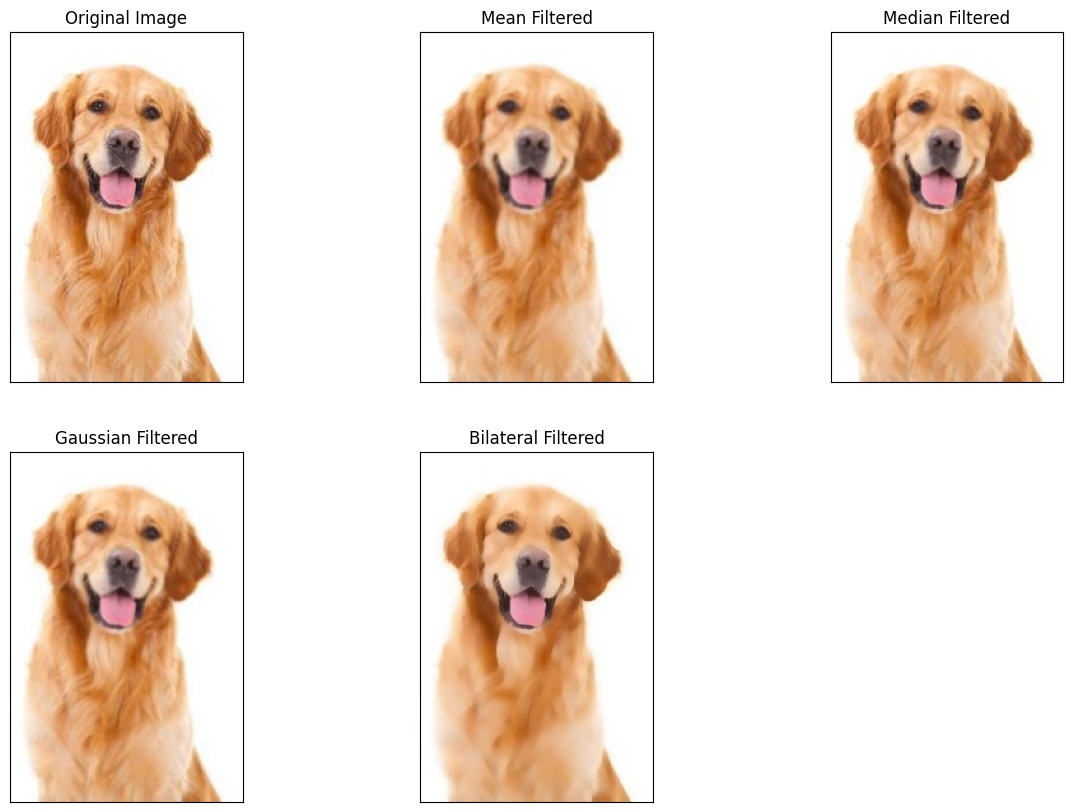

In [8]:
# 均值滤波、高斯滤波、中值滤波、双边滤波
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 定义滤波核大小
kernel_size = 3

# 一、对图像进行均值滤波
# cv2.blur 函数用于进行均值滤波操作，它有以下主要参数：
# - src: 输入的图像
# - ksize: 卷积核的大小，通常是一个元组 (width, height)，这里使用 (kernel_size, kernel_size)
# - anchor: 锚点位置，默认值为 (-1, -1) 表示卷积核的中心
# - borderType: 边界填充类型，默认为 cv2.BORDER_DEFAULT
mean_filtered = cv2.blur(img_rgb, (kernel_size, kernel_size))

# 二、对图像进行中值滤波
# cv2.medianBlur 函数用于进行中值滤波操作，它有以下主要参数：
# - src: 输入的图像
# - ksize: 卷积核的大小，必须是大于 1 的奇数，这里使用 kernel_size
# 中值滤波是取卷积核区域内像素值的中值作为中心像素的值，常用于去除椒盐噪声
median_filtered = cv2.medianBlur(img_rgb, kernel_size)

# 三、对图像进行高斯滤波
# cv2.GaussianBlur 函数用于进行高斯滤波操作，它有以下主要参数：
# - src: 输入的图像
# - ksize: 卷积核的大小，必须是奇数，通常是 (width, height)，这里使用 (kernel_size, kernel_size)
# - sigmaX: X 方向的高斯核标准差，如果为 0，则根据 ksize 自动计算
# - sigmaY: Y 方向的高斯核标准差，如果为 0，则与 sigmaX 相同
# 高斯滤波是根据高斯函数对图像进行加权平均，能有效去除高斯噪声
gaussian_filtered = cv2.GaussianBlur(img_rgb, (kernel_size, kernel_size), 0)

# 四、对图像进行双边滤波
# cv2.bilateralFilter 函数用于进行双边滤波操作，它有以下主要参数：
# - src: 输入的图像
# - d: 滤波时使用的像素邻域直径，如果为负数，则根据 sigmaSpace 自动计算
# - sigmaColor: 颜色空间滤波器的标准差，值越大表示在颜色空间中越容易融合不同颜色
# - sigmaSpace: 坐标空间滤波器的标准差，值越大表示在坐标空间中越容易融合不同位置的像素
# 双边滤波能在平滑图像的同时保留边缘信息
bilateral_filtered = cv2.bilateralFilter(img_rgb, 9, 75, 75)

# 显示图像
plt.figure(figsize=(15, 10))

# 显示原图像
plt.subplot(231), plt.imshow(img_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# 显示均值滤波结果
plt.subplot(232), plt.imshow(mean_filtered)
plt.title('Mean Filtered'), plt.xticks([]), plt.yticks([])
# 注：均值滤波使图像整体更加平滑，细微纹理和噪点被模糊处理，同时边缘部分也有一定程度模糊，
# 因其对邻域像素简单求平均，未区分边缘与非边缘区域。

# 显示中值滤波结果
plt.subplot(233), plt.imshow(median_filtered)
plt.title('Median Filtered'), plt.xticks([]), plt.yticks([])
# 注：中值滤波对椒盐噪声等离散噪声点去除效果显著，且相比均值滤波能更好地保持图像边缘信息，
# 图像轮廓不会过度模糊，因为它是取邻域像素中值来替代中心像素值。

# 显示高斯滤波结果
plt.subplot(234), plt.imshow(gaussian_filtered)
plt.title('Gaussian Filtered'), plt.xticks([]), plt.yticks([])
# 注：高斯滤波能有效抑制符合高斯分布的噪声，平滑效果自然，
# 基于高斯函数对邻域像素加权平均，距离中心像素近的点权重高，不会产生生硬模糊感。

# 显示双边滤波结果
plt.subplot(235), plt.imshow(bilateral_filtered)
plt.title('Bilateral Filtered'), plt.xticks([]), plt.yticks([])
# 注：双边滤波在平滑图像的同时能很好地保留边缘信息，图像边缘清晰，
# 且在去除噪声时能较好地保留图像细节特征，在细节和整体平滑度间取得较好平衡。

plt.show()

### 3.图像几何变换
这部分是图像几何变换的内容，包括旋转、平移、缩放等操作。
- 图像平移：使用 `cv2.warpAffine` 函数实现图像在平面上的平移操作，原理是通过构建平移矩阵，指定沿 `x` 轴和 `y` 轴方向的位移量，从而改变图像像素的位置 。
- 图像旋转：利用 `cv2.getRotationMatrix2D` 获取旋转矩阵，再结合 `cv2.warpAffine` 实现图像绕指定点的旋转，包括旋转角度、旋转中心等参数的设置及对图像的影响 。
- 图像翻转：说明 `cv2.flip` 函数的用法，可实现图像沿水平、垂直方向或同时沿两个方向翻转。

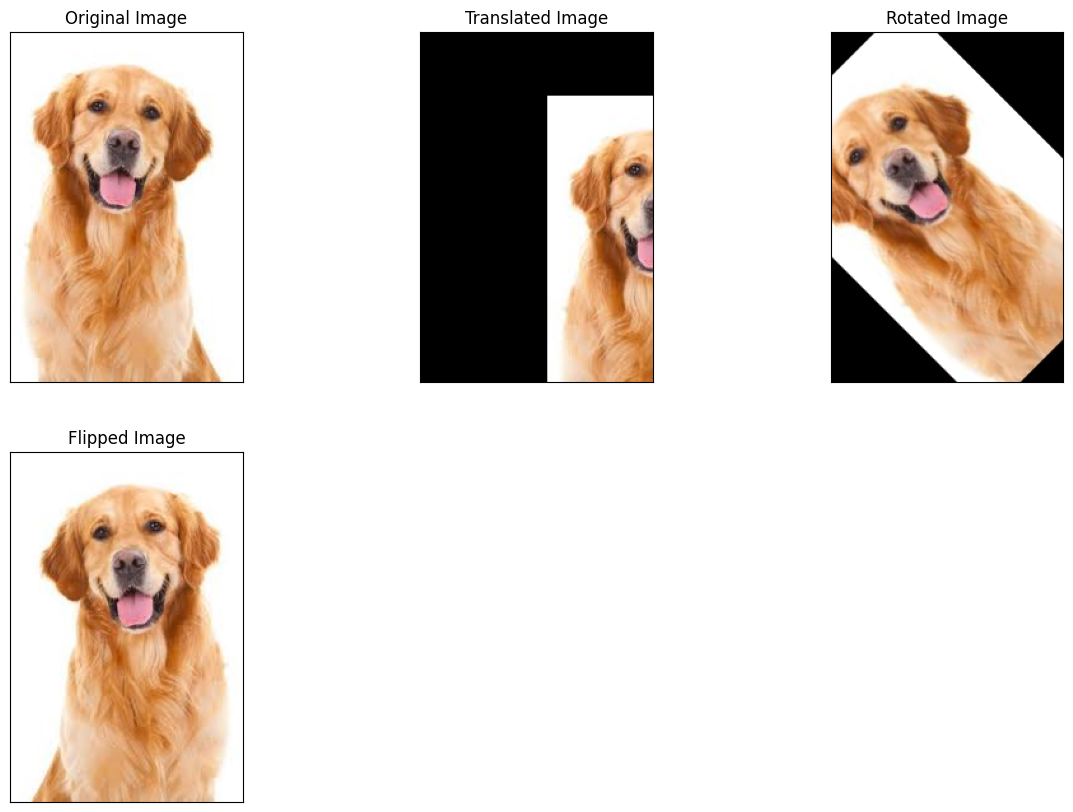

In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 图像平移
# 使用cv2.warpAffine函数进行图像平移
# 参数说明：
# - src：输入图像，这里是img_rgb
# - M：变换矩阵，2x3的numpy数组
# - dsize：输出图像的大小，格式为 (width, height)
# 定义平移向量，沿x轴平移100个像素，沿y轴平移50个像素
tx = 100
ty = 50
M = np.float32([[1, 0, tx], [0, 1, ty]])
# 获取图像的高度和宽度
height, width = img_rgb.shape[:2]
# 进行平移操作
translated_img = cv2.warpAffine(img_rgb, M, (width, height))

# 图像旋转
# 使用cv2.getRotationMatrix2D函数获取旋转矩阵，再用cv2.warpAffine进行旋转
# 参数说明：
# - center：旋转中心，这里设为图像中心 (width / 2, height / 2)
# - angle：旋转角度，设为45度
# - scale：缩放比例，设为1.0，即不缩放
center = (width / 2, height / 2)
angle = 45
scale = 1.0
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale)
rotated_img = cv2.warpAffine(img_rgb, rotation_matrix, (width, height))

# 图像翻转
# 使用cv2.flip函数进行图像翻转
# 参数说明：
# - flipCode：翻转模式，0表示沿x轴翻转，1表示沿y轴翻转，-1表示沿x轴和y轴同时翻转
# 这里沿y轴翻转
flipped_img = cv2.flip(img_rgb, 1)

# 显示图像
plt.figure(figsize=(15, 10))

# 显示原图像
plt.subplot(231), plt.imshow(img_rgb)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])

# 显示平移后的图像
plt.subplot(232), plt.imshow(translated_img)
plt.title('Translated Image'), plt.xticks([]), plt.yticks([])

# 显示旋转后的图像
plt.subplot(233), plt.imshow(rotated_img)
plt.title('Rotated Image'), plt.xticks([]), plt.yticks([])

# 显示翻转后的图像
plt.subplot(234), plt.imshow(flipped_img)
plt.title('Flipped Image'), plt.xticks([]), plt.yticks([])

plt.show()

### 4. 图像阈值处理
在图像处理中，阈值处理是一项基础且关键的操作，它能够将图像中的像素点根据设定的阈值进行分类，从而实现图像的分割、特征提取等功能。这部分主要涵盖以下内容：
- **全局阈值**：在处理图像时，当我们希望依据一个固定的阈值对整幅图像进行统一处理，就会用到全局阈值方法。这里主要使用 `cv2.threshold` 函数来进行全局阈值分割。
    - **二值化**：该操作是将图像像素根据设定的阈值，明确地分为 0 和 255 两个值。比如在一张灰度图像中，像素值小于阈值的被归为 0（通常显示为黑色），大于等于阈值的则被设为 255（通常显示为白色），这样就能突出图像中的某些特征，或者分离前景与背景。
    - **反二值化**：与二值化相反，像素值小于阈值的被设为 255，大于等于阈值的变为 0 。这种操作在一些特定场景下，能以不同的方式呈现图像的信息。
    - **函数参数详解**：
        - **thresh（阈值）**：这是一个关键参数，它是像素值分类的依据。当像素值与这个值进行比较后，根据所选的阈值类型来决定最终的像素取值。
        - **maxval（最大值）**：在某些阈值类型（如 `cv2.THRESH_BINARY` ）中，当像素值满足特定条件时，会被赋予这个 `maxval` 值，一般设为 255 来表示白色。
        - **type（阈值类型）**：常见的如 `cv2.THRESH_BINARY` ，它按照阈值将像素分为 0 和 `maxval` 两个值；`cv2.THRESH_BINARY_INV` 则是反向的二值化操作。不同的阈值类型会产生截然不同的图像效果，需根据实际需求灵活选择。
 - **自适应阈值**：在实际场景中，很多图像存在光照不均匀的情况，此时固定的全局阈值无法取得理想的处理效果。`cv2.adaptiveThreshold` 函数应运而生，它能够根据图像局部区域的特性自适应地计算阈值。
    - **适用场景**：比如拍摄的文档图片，可能存在部分区域过亮或过暗，使用自适应阈值就能更好地处理这类图像，使文字等内容更清晰地被提取出来。
    - **函数参数作用**：
        - **blockSize（邻域大小）**：该参数定义了用于计算局部阈值的邻域范围，即一个正方形区域的边长。这个区域大小的选择很重要，过大可能导致局部特征被过度平滑，过小则可能无法准确反映局部的光照和像素分布情况。
        - **C（从均值或高斯加权均值中减去的常数 ）**：在计算局部阈值时，会先算出邻域内像素的均值或高斯加权均值，然后减去这个常数 `C` 得到最终的局部阈值。通过调整 `C` 的值，可以控制阈值的大小，进而影响图像的处理效果 。 

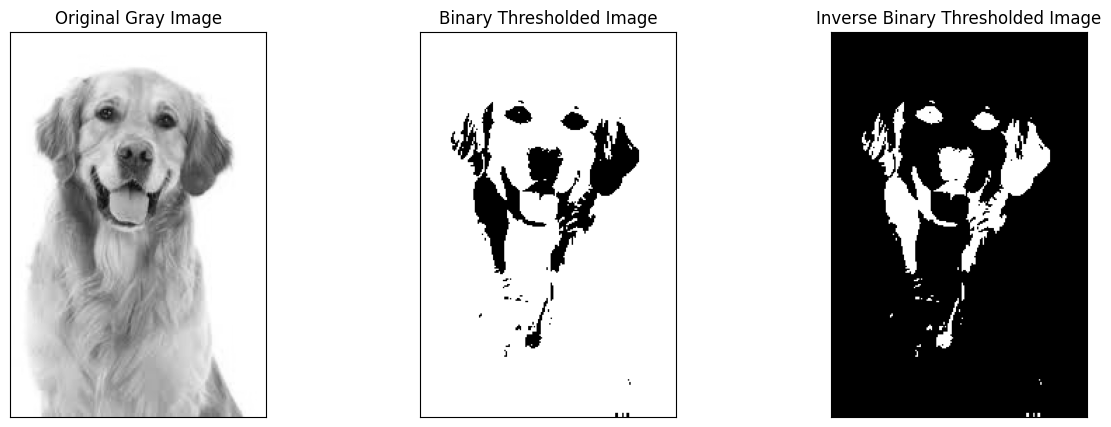

In [ ]:
# 全局阈值
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
# 将图像转换为灰度图像，因为阈值处理通常在灰度图像上进行
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 二值化
# cv2.threshold 函数用于进行阈值处理，它有以下主要参数：
# - src: 输入的图像，这里是灰度图像 img_gray
# - thresh: 阈值，像素值大于该阈值的将被处理为 maxval，小于的将被处理为 0
# - maxval: 最大值，当像素值满足条件时将被赋予该值
# - type: 阈值类型，这里使用 cv2.THRESH_BINARY 表示二值化
# 返回值 ret 是实际使用的阈值，thresh_binary 是二值化后的图像
ret, thresh_binary = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)

# 反二值化
# 同样使用 cv2.threshold 函数，只是将阈值类型改为 cv2.THRESH_BINARY_INV 表示反二值化
# 此时像素值大于阈值的将被处理为 0，小于的将被处理为 maxval
ret, thresh_binary_inv = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY_INV)

# 图像显示
plt.figure(figsize=(15, 5))

# 显示原灰度图像
plt.subplot(131), plt.imshow(img_gray, cmap='gray')
plt.title('Original Gray Image'), plt.xticks([]), plt.yticks([])

# 显示二值化后的图像
plt.subplot(132), plt.imshow(thresh_binary, cmap='gray')
plt.title('Binary Thresholded Image'), plt.xticks([]), plt.yticks([])
"""
注：可以看出图像被清晰地分为了黑白两部分。灰度值高于阈值的像素变为白色（255），低于阈值的像素变为黑色（0）。
图像中的物体轮廓在二值化后变得更加明显，有助于进行物体的分割和识别。
但如果图像光照不均匀，可能会出现部分区域分割不准确的情况，比如较暗区域的一些本应属于物体的部分可能会被误判为背景。
"""
# 显示反二值化后的图像
plt.subplot(133), plt.imshow(thresh_binary_inv, cmap='gray')
plt.title('Inverse Binary Thresholded Image'), plt.xticks([]), plt.yticks([])
"""
注：可以看出反二值化的结果与二值化相反，灰度值高于阈值的像素变为黑色（0），低于阈值的像素变为白色（255）。
这种处理方式在某些场景下很有用，例如当我们关注的物体在原图像中是较暗的部分时，
反二值化可以让这些物体以白色的形式突出显示，便于后续分析。
"""

plt.show()

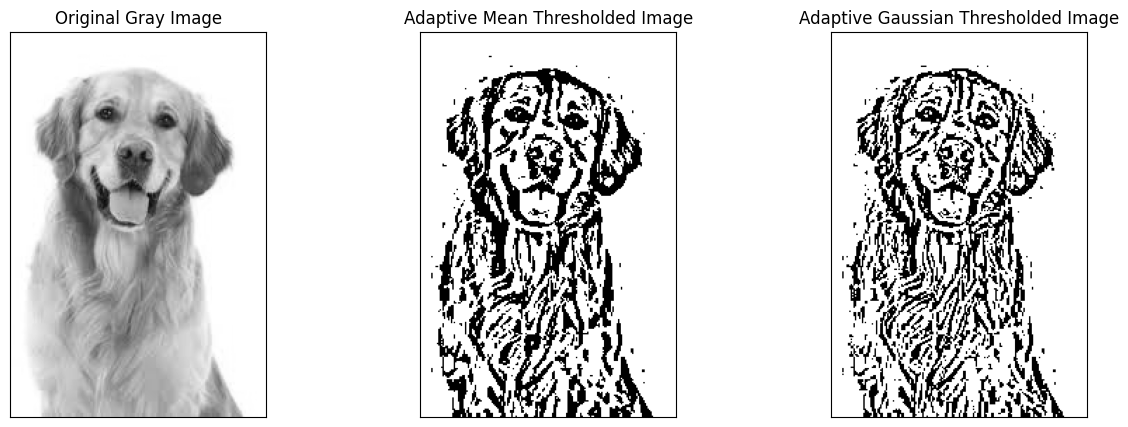

In [ ]:
# 自适应阈值
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 读取图像
img = cv2.imread('./OpenCV_files/dog.jpg', cv2.IMREAD_COLOR)
# 将图像转换为灰度图像，因为自适应阈值处理通常在灰度图像上进行
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 自适应阈值处理
# cv2.adaptiveThreshold 函数用于进行自适应阈值处理，它有以下主要参数：
# - src: 输入的图像，这里是灰度图像 img_gray
# - maxValue: 最大值，当像素值满足条件时将被赋予该值
# - adaptiveMethod: 自适应方法，有两种选择：
#       - cv2.ADAPTIVE_THRESH_MEAN_C: 邻域内的均值作为阈值
#       - cv2.ADAPTIVE_THRESH_GAUSSIAN_C: 邻域内的高斯加权均值作为阈值
# - thresholdType: 阈值类型，通常使用 cv2.THRESH_BINARY
# - blockSize: 邻域大小，用于计算局部阈值的正方形区域的边长，必须是大于 1 的奇数
# - C: 从均值或高斯加权均值中减去的常数
# 这里使用均值自适应方法
adaptive_mean = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
                                      cv2.THRESH_BINARY, 11, 2)
# 这里使用高斯加权自适应方法
adaptive_gaussian = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                          cv2.THRESH_BINARY, 11, 2)

# 图像显示
plt.figure(figsize=(15, 5))

# 显示原灰度图像
plt.subplot(131), plt.imshow(img_gray, cmap='gray')
plt.title('Original Gray Image'), plt.xticks([]), plt.yticks([])

# 显示均值自适应阈值处理后的图像
plt.subplot(132), plt.imshow(adaptive_mean, cmap='gray')
plt.title('Adaptive Mean Thresholded Image'), plt.xticks([]), plt.yticks([])
"""
注：可以看出均值自适应阈值处理能够根据图像的局部区域特性来计算阈值。
在光照不均匀的情况下，相比全局阈值处理，它能更好地适应不同区域的亮度变化，使得图像的各个部分都能得到较为合适的分割。
例如，在较亮和较暗的区域都能清晰地显示出物体的轮廓，
减少了因光照差异导致的分割误差。但可能会存在一些局部细节的丢失，因为它是基于邻域均值进行阈值计算的。
"""

# 显示高斯加权自适应阈值处理后的图像
plt.subplot(133), plt.imshow(adaptive_gaussian, cmap='gray')
plt.title('Adaptive Gaussian Thresholded Image'), plt.xticks([]), plt.yticks([])
"""
 注：可以看出高斯加权自适应阈值处理结合了高斯加权的思想，对邻域内的像素进行加权平均来计算阈值。
 它在处理光照不均匀图像时比均值自适应阈值更具优势，因为它更注重邻域中心像素的影响，能够更好地保留图像的细节信息。
 图像中的物体轮廓更加清晰，边缘过渡也更加自然，对于复杂光照条件下的图像分割效果较好。
"""

plt.show()